### Visualisations.

https://matplotlib.org/stable/gallery/statistics/time_series_histogram.html#sphx-glr-gallery-statistics-time-series-histogram-py

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from aeon.datasets import load_classification
import seaborn as sns
sns.set_theme()

In [34]:
# built-in ECG5000 time series classification dataset from aeon
X, y = load_classification("ECG5000")
print(X.shape,  y.shape)

(5000, 1, 140) (5000,)


In [35]:
all_data = pd.read_csv("../../fulldataset_ECG5000.csv")
all_data = all_data.set_index('label')
#all_data = all_data.set_index('label')
print(f'Data shape: {all_data.shape}\nIndex counts:\n{all_data.index.value_counts()}')

Data shape: (5000, 140)
Index counts:
label
1    2919
2    1767
4     194
3      96
5      24
Name: count, dtype: int64


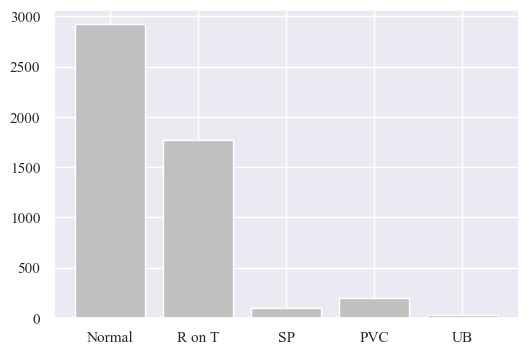

In [36]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(1, 1, figsize=(6,4))

ax.bar('Normal', all_data.index.value_counts()[1], color='silver')
ax.bar('R on T', all_data.index.value_counts()[2], color='silver')
ax.bar('SP', all_data.index.value_counts()[3], color='silver')
ax.bar('PVC', all_data.index.value_counts()[4], color='silver')
ax.bar('UB', all_data.index.value_counts()[5], color='silver')
#ax.tick_params(labelsize=12)
#ax.grid(axis='x', which='both')
#ax.text(1.3,2300, 'Category Frequency \nHistogram', fontsize=16,bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10})
#ax.set_yscale('log')
#ax.set_yticks([ 100,  4000,  1000])
plt.savefig(f'class_freq_hist.png', dpi=1200, bbox_inches='tight')

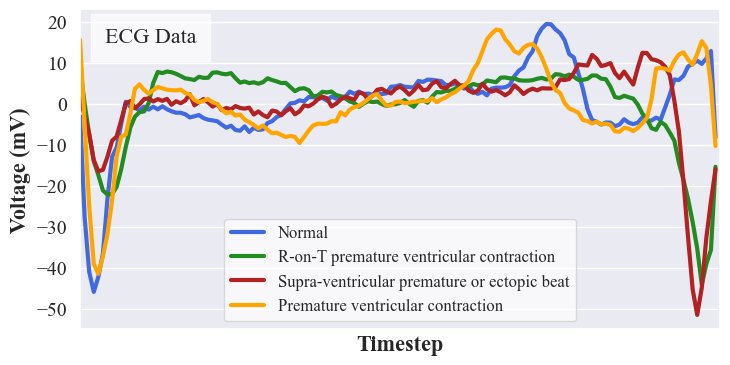

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
#ax.set_prop_cycle('color', list(plt.cm.Blues(np.linspace(2, 1, len(all_data)))))

ax.plot(all_data.loc[1].iloc[6] * 10, label='Normal', color='royalblue', linewidth=3)
ax.plot(all_data.loc[2].iloc[3] * 10, label='R-on-T premature ventricular contraction', color='forestgreen', linewidth=3)
ax.plot(all_data.loc[3].iloc[3] * 10, label='Supra-ventricular premature or ectopic beat', color='firebrick', linewidth=3)
ax.plot(all_data.loc[4].iloc[4] * 10, label='Premature ventricular contraction', color='orange', linewidth=3)
ax.set_xlabel('Timestep', fontsize='16', weight='bold')
ax.tick_params(labelsize=14)
ax.set_ylabel('Voltage (mV)', fontsize='16', weight='bold')
ax.set_xlim(0, 140)
ax.set_yticks(np.arange(-50, 22, 10))
ax.get_xaxis().set_ticks([])
ax.grid(True)
ax.text(5.5, 15, 'ECG Data', fontsize=16, bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10})
ax.legend(loc='lower center', fontsize='12', facecolor='white', framealpha=0.7)
plt.show()

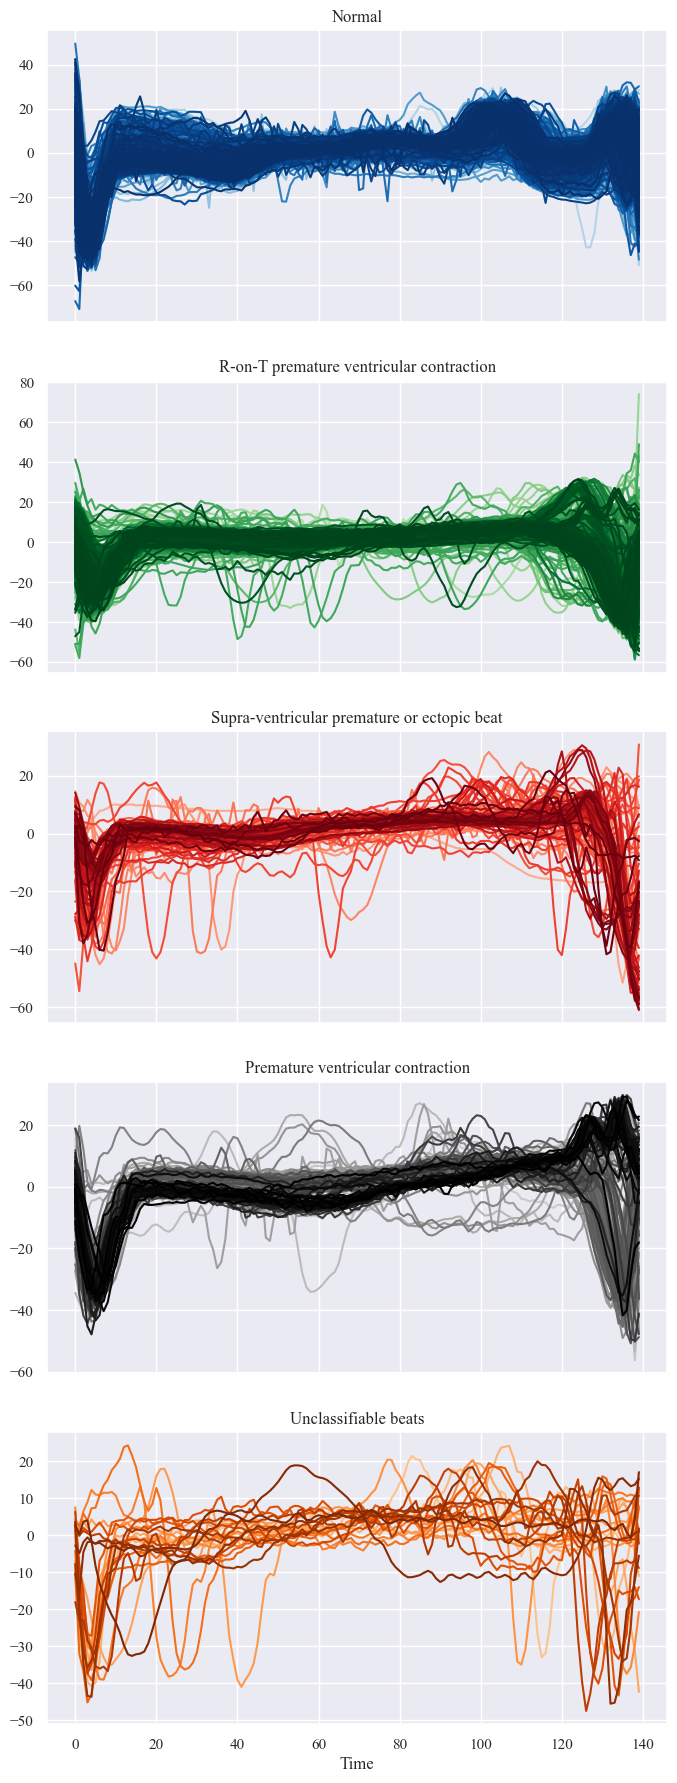

In [38]:
fig, ax = plt.subplots(5, 1, figsize=(8, 22), sharex=True)

ax[4].set_xlabel('Time')
ax[0].set_title('Normal')
ax[1].set_title('R-on-T premature ventricular contraction')
ax[2].set_title('Supra-ventricular premature or ectopic beat')
ax[3].set_title('Premature ventricular contraction')
ax[4].set_title('Unclassifiable beats')
ax[0].set_prop_cycle('color', list(plt.cm.Blues(np.linspace(0.3, 1, all_data.index.value_counts()[1]))))
ax[1].set_prop_cycle('color', list(plt.cm.Greens(np.linspace(0.3, 1, all_data.index.value_counts()[2]))))
ax[2].set_prop_cycle('color', list(plt.cm.Reds(np.linspace(0.3, 1, all_data.index.value_counts()[3]))))
ax[3].set_prop_cycle('color', list(plt.cm.Greys(np.linspace(0.3, 1, all_data.index.value_counts()[4]))))
ax[4].set_prop_cycle('color', list(plt.cm.Oranges(np.linspace(0.3, 1, all_data.index.value_counts()[5]))))

for row in all_data.iterrows():
    ax[row[0]-1].plot(row[1].values * 10)